In [1]:
import panel as pn
import altair as alt
from altair import datum
import pandas as pd
import datetime as dt
from pandas_profiling import ProfileReport
import numpy as np
import os
from os import listdir
import warnings
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data//USData//ohio-history.csv")
files=os.listdir("data//USData//")

In [3]:
df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [4]:
frames=[]
for file in files:
    df=pd.read_csv("data//USData//"+file)
    df['date']=pd.to_datetime(df['date'])
    df=df.fillna(0)
    df=df.sort_values(by='date',ascending=True)
    frames.append(df)
    #print(df.shape)
final=pd.concat(frames)

In [5]:
final.to_csv("data//USCombined.csv")

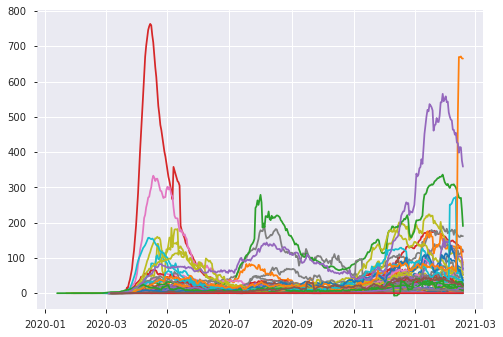

In [12]:
states=final['state'].unique()
data={}
for state in states:
    df=final[final['state']==state]
    df['deathIncreaseSmooth']=df['deathIncrease'].rolling(7, min_periods=1).mean()
    plt.plot(df['date'],df['deathIncreaseSmooth'],label=state)
plt.show()

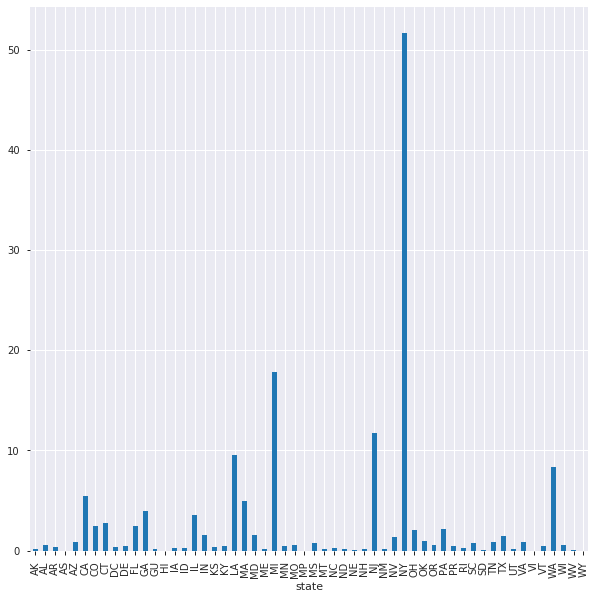

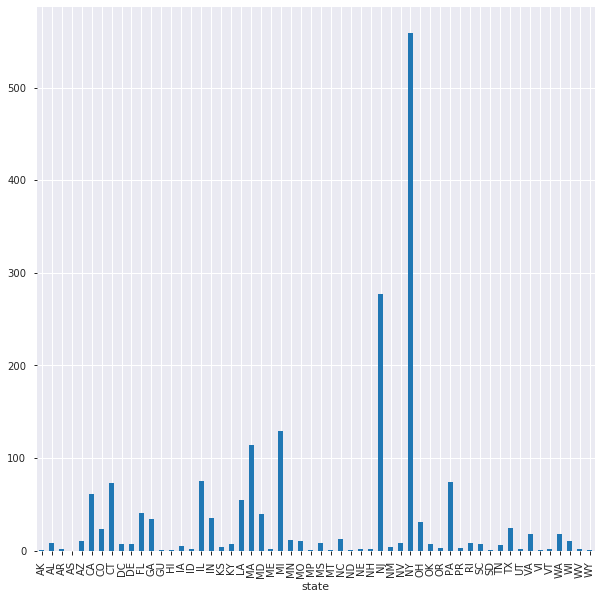

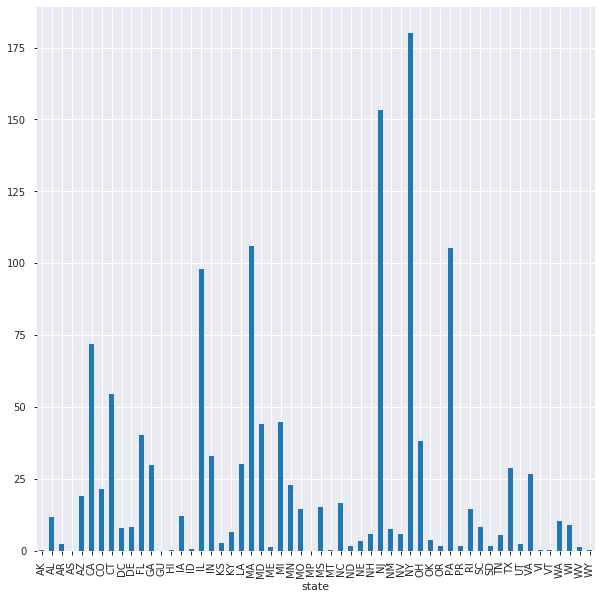

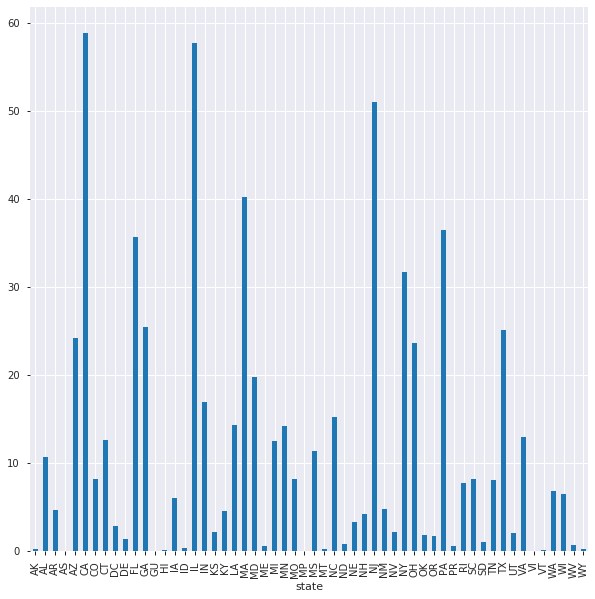

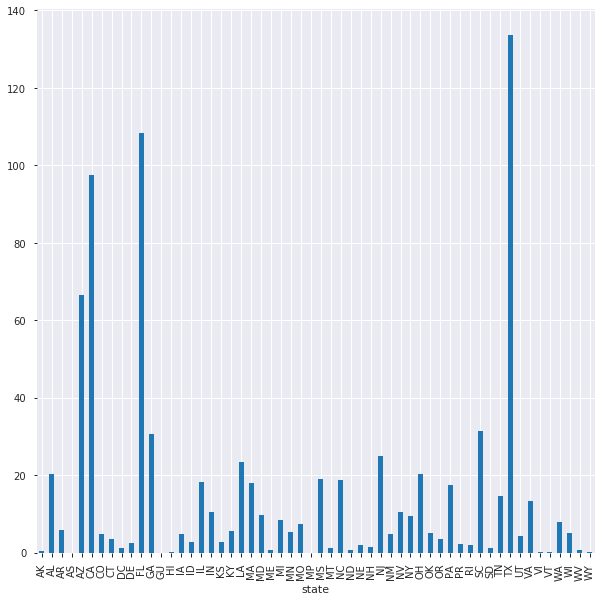

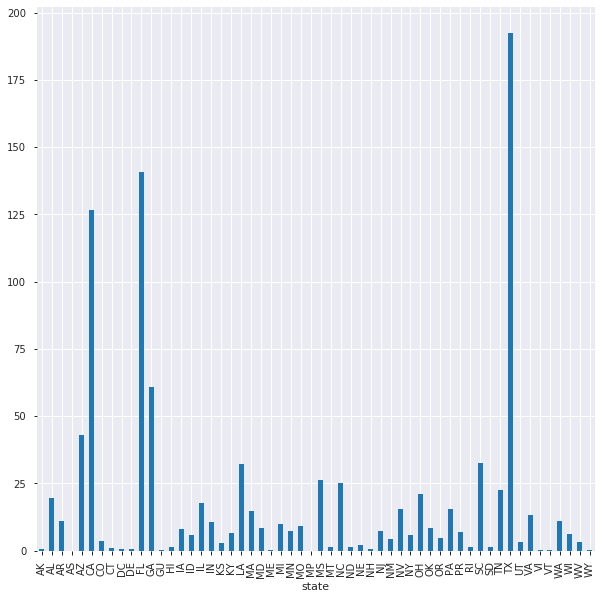

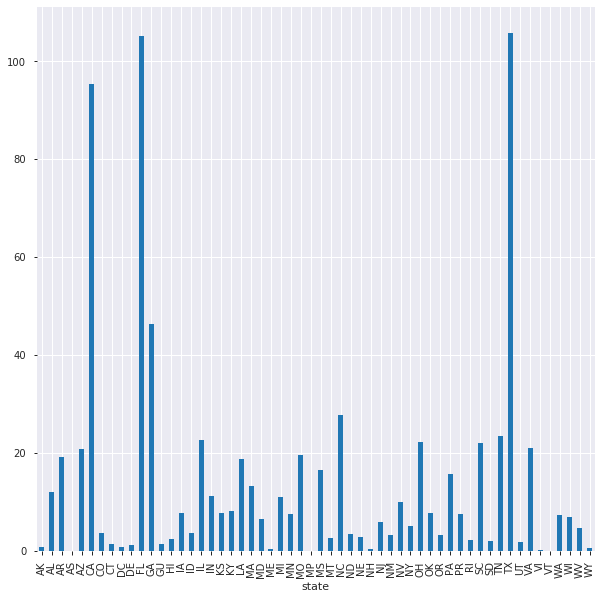

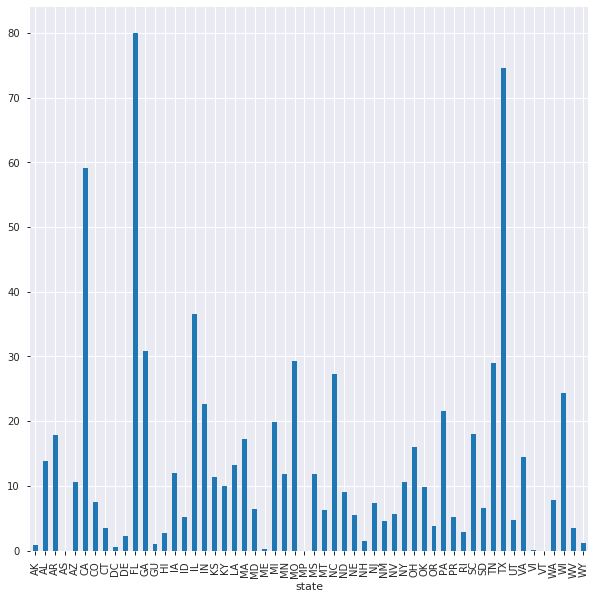

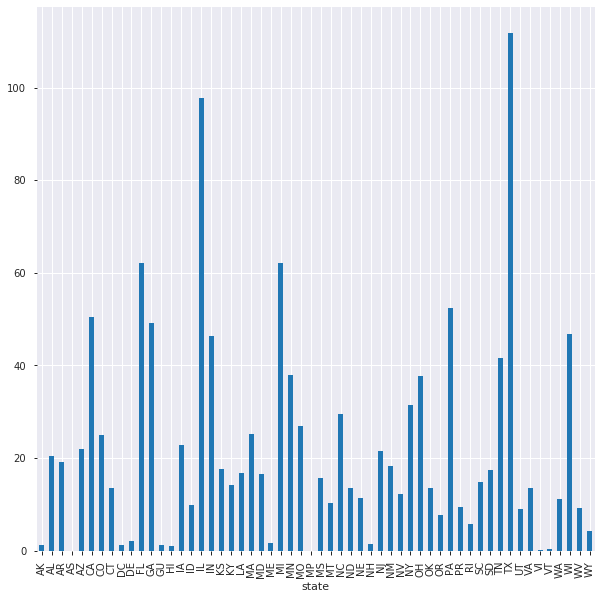

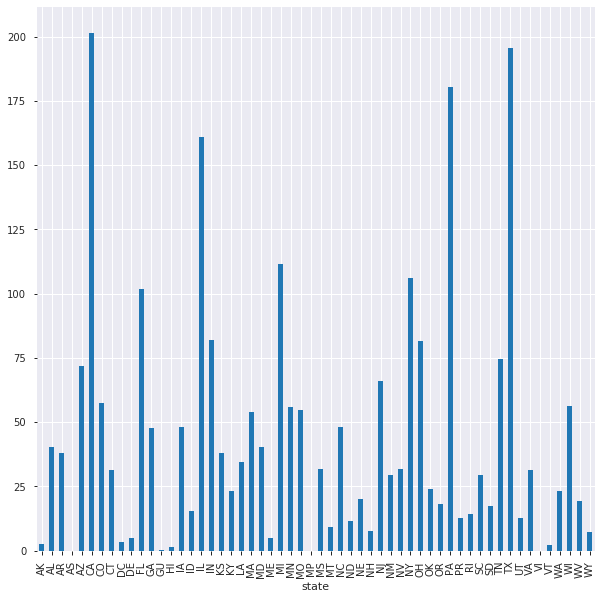

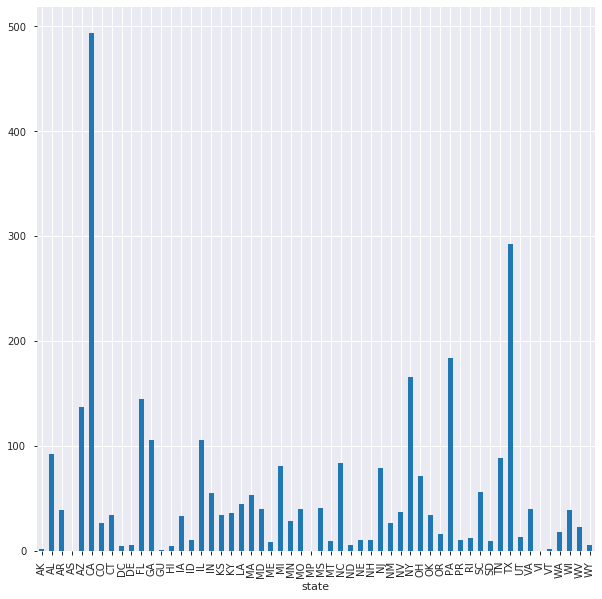

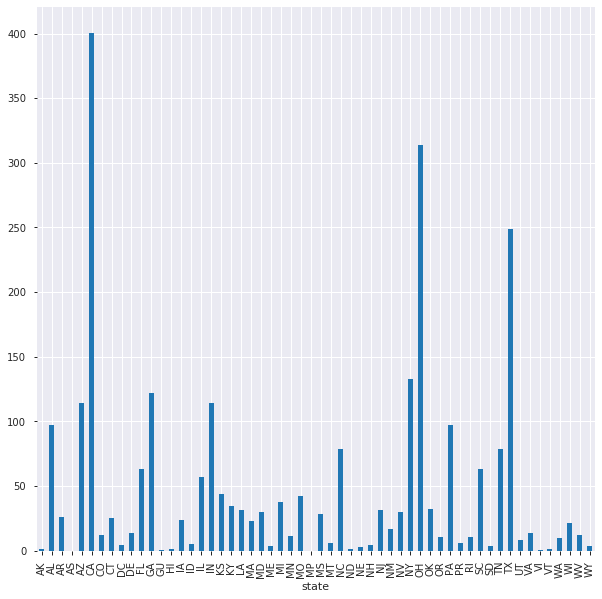

In [17]:
states=final['state'].unique()
data={}
final['month'] = pd.DatetimeIndex(final['date']).month
months=final['month'].unique()
for month in months:
    df=final[final['month']==month]
    fig, ax = plt.subplots(figsize=(10,10))
    abcd = df.groupby(['state'])['deathIncrease'].mean()
    abcd.plot.bar()
    
plt.show()

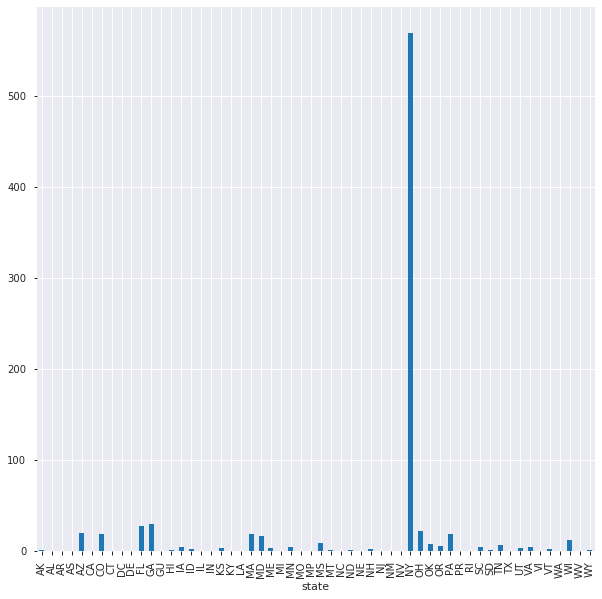

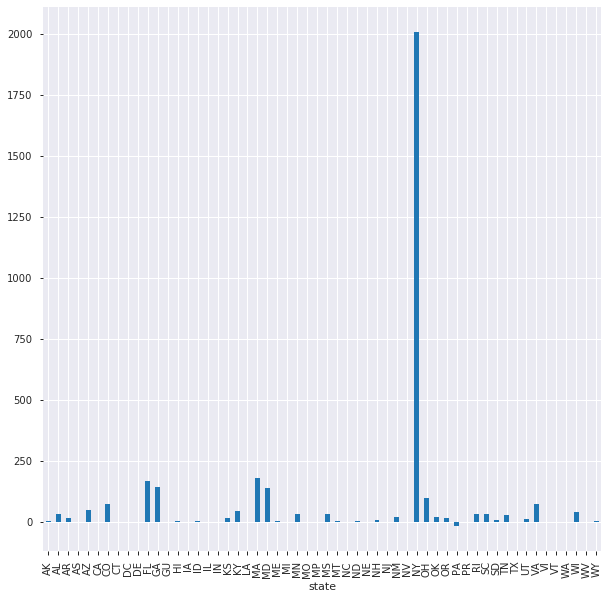

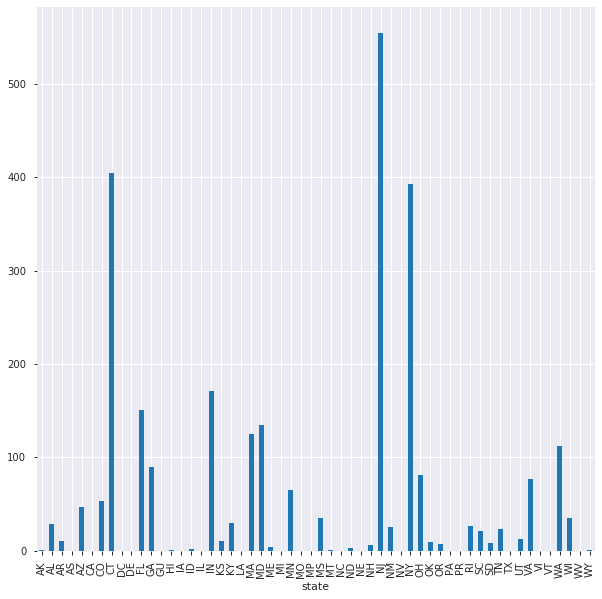

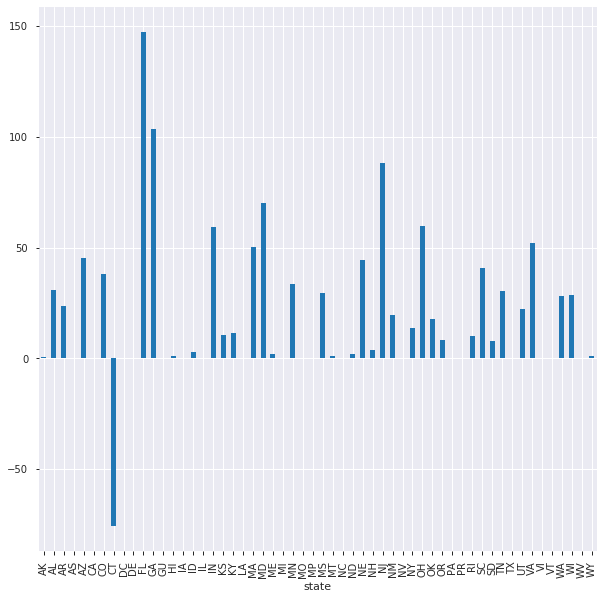

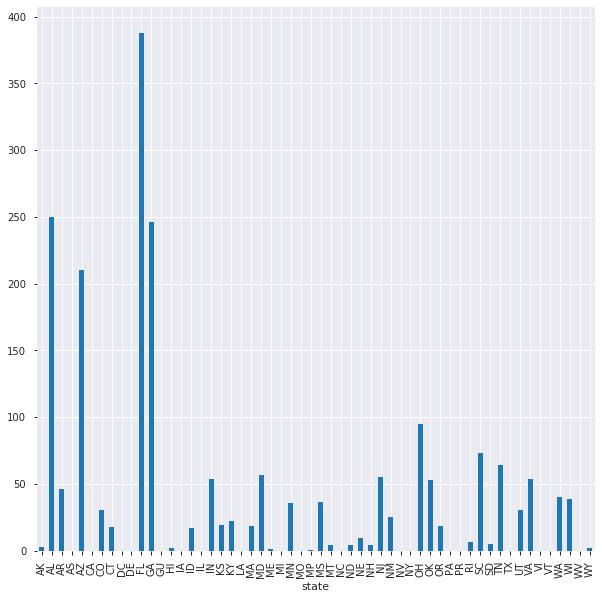

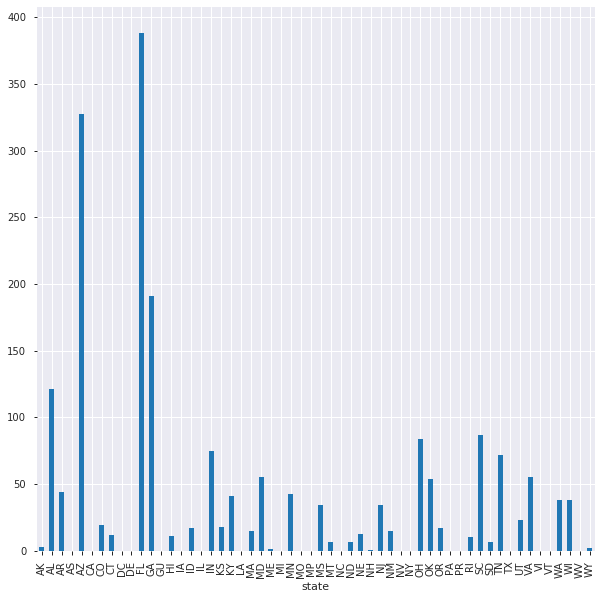

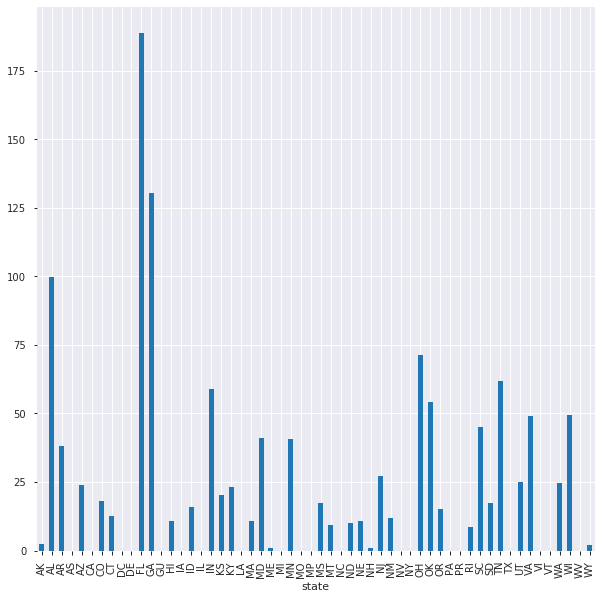

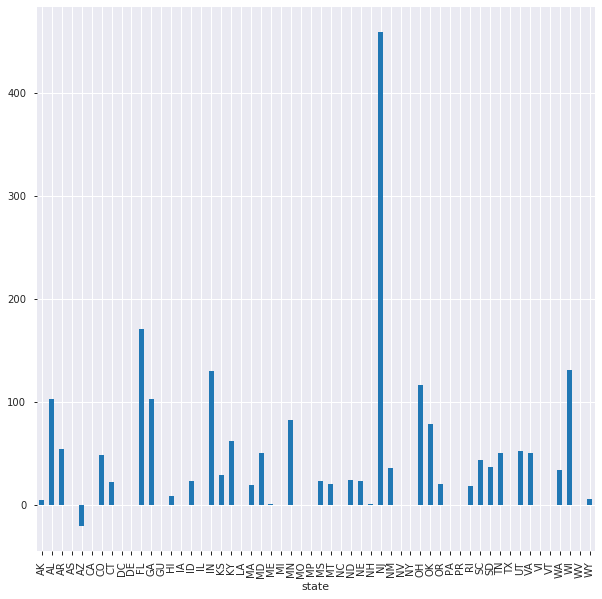

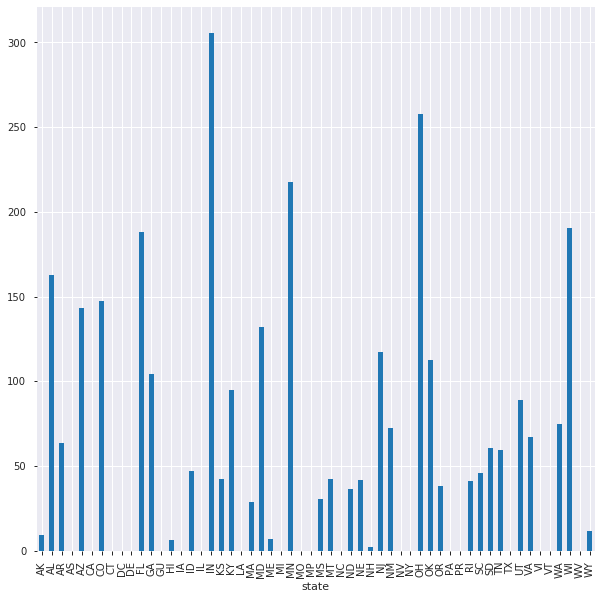

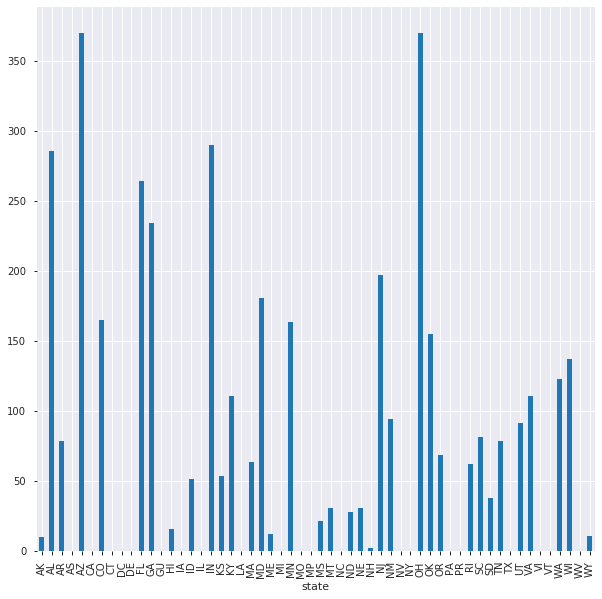

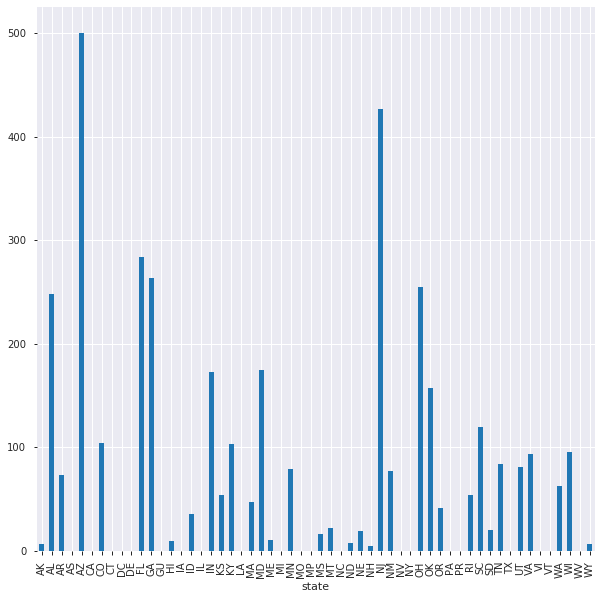

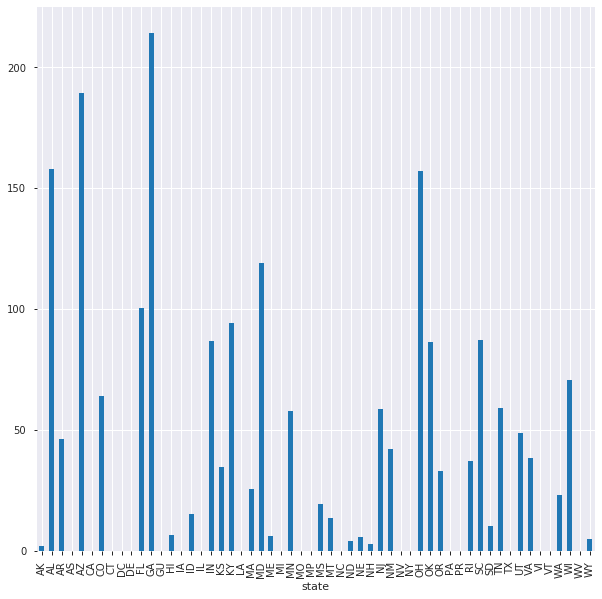

In [18]:
states=final['state'].unique()
data={}
final['month'] = pd.DatetimeIndex(final['date']).month
months=final['month'].unique()
for month in months:
    df=final[final['month']==month]
    fig, ax = plt.subplots(figsize=(10,10))
    abcd = df.groupby(['state'])['hospitalizedIncrease'].mean()
    abcd.plot.bar()
    
plt.show()

In [10]:
%conda install  geopandas
%conda install  pyshp
%conda install  shapely

Solving environment: done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopandas-0.4.0            |           py36_1         904 KB
    ------------------------------------------------------------
                                           Total:         904 KB

The following packages will be UPDATED:

  geopandas          conda-forge/noarch::geopandas-0.3.0-p~ --> pkgs/main/linux-64::geopandas-0.4.0-py36_1



geopandas-0.4.0      | 904 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
Solving environment: done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / upda

In [25]:
%conda install -c plotly plotly-geo


Solving environment: done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs:
    - plotly-geo


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-geo-1.0.0           |             py_0        18.9 MB  plotly
    ------------------------------------------------------------
                                           Total:        18.9 MB

The following NEW packages will be INSTALLED:

  plotly-geo         plotly/noarch::plotly-geo-1.0.0-py_0



plotly-geo-1.0.0     | 18.9 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
